In [107]:
import pandas as pd
import matplotlib.pyplot as plt
xls = pd.ExcelFile('Desktop/CloudTara/Microsoft_Train.xlsx')
ms = pd.read_excel(xls, 'Sheet1')
print(ms)

   Valuation Date TTM Revenue TTM EBITDA  EBITDA Margin (%)
0      2005-12-31      $8.49B     $0.55B             0.0651
1      2006-12-31     $10.71B     $0.59B             0.0555
2      2007-12-31     $14.84B     $0.90B             0.0607
3      2008-12-31     $19.17B     $1.13B             0.0589
4      2009-12-31     $24.51B     $1.51B             0.0615
5      2010-12-31     $34.20B     $1.97B             0.0577
6      2011-12-31     $48.08B     $1.95B             0.0405
7      2012-12-31     $61.09B     $2.84B             0.0464
8      2013-12-31     $74.45B     $4.00B             0.0537
9      2014-12-31     $88.99B     $4.92B             0.0553
10     2015-12-31    $107.01B     $8.51B             0.0796
11     2016-12-31    $135.99B    $12.30B             0.0905
12     2017-12-31    $177.87B    $15.58B             0.0876
13     2018-12-31    $232.89B    $27.76B             0.1192
14     2019-12-31    $280.52B    $36.33B             0.1295


In [108]:
ms['Revenue1'] = ms['TTM Revenue'].str.replace('$','')
ms['Revenue'] = ms['Revenue1'].str.replace('B','')
ms.drop(['Revenue1'], axis=1)

,Valuation Date,TTM Revenue,TTM EBITDA,EBITDA Margin (%),Revenue
0,2005-12-31,$8.49B,$0.55B,0.0651,8.49
1,2006-12-31,$10.71B,$0.59B,0.0555,10.71
2,2007-12-31,$14.84B,$0.90B,0.0607,14.84
3,2008-12-31,$19.17B,$1.13B,0.0589,19.17
4,2009-12-31,$24.51B,$1.51B,0.0615,24.51
5,2010-12-31,$34.20B,$1.97B,0.0577,34.20
6,2011-12-31,$48.08B,$1.95B,0.0405,48.08
7,2012-12-31,$61.09B,$2.84B,0.0464,61.09
8,2013-12-31,$74.45B,$4.00B,0.0537,74.45
9,2014-12-31,$88.99B,$4.92B,0.0553,88.99


In [109]:
ms['a'] = ms['TTM EBITDA'].str.replace('$','')
ms['EBITDA'] = ms['a'].str.replace('B','')
ms.drop(['Revenue1','a'], axis=1)

,Valuation Date,TTM Revenue,TTM EBITDA,EBITDA Margin (%),Revenue,EBITDA
0,2005-12-31,$8.49B,$0.55B,0.0651,8.49,0.55
1,2006-12-31,$10.71B,$0.59B,0.0555,10.71,0.59
2,2007-12-31,$14.84B,$0.90B,0.0607,14.84,0.90
3,2008-12-31,$19.17B,$1.13B,0.0589,19.17,1.13
4,2009-12-31,$24.51B,$1.51B,0.0615,24.51,1.51
5,2010-12-31,$34.20B,$1.97B,0.0577,34.20,1.97
6,2011-12-31,$48.08B,$1.95B,0.0405,48.08,1.95
7,2012-12-31,$61.09B,$2.84B,0.0464,61.09,2.84
8,2013-12-31,$74.45B,$4.00B,0.0537,74.45,4.00
9,2014-12-31,$88.99B,$4.92B,0.0553,88.99,4.92


In [110]:
ms["Revenue"] = pd.to_numeric(ms["Revenue"])
ms["EBITDA"] = pd.to_numeric(ms["EBITDA"])

In [111]:
ms['Yearly Growth %'] = ((ms['Revenue'] - ms['Revenue'].shift(1))/ms['Revenue'].shift(1))*100

In [112]:
ms['Yearly Growth %'] = ms['Yearly Growth %'].fillna(0)

In [113]:
ms['Valuation Date']=pd.to_datetime(ms['Valuation Date'])
ms=ms.set_index('Valuation Date')

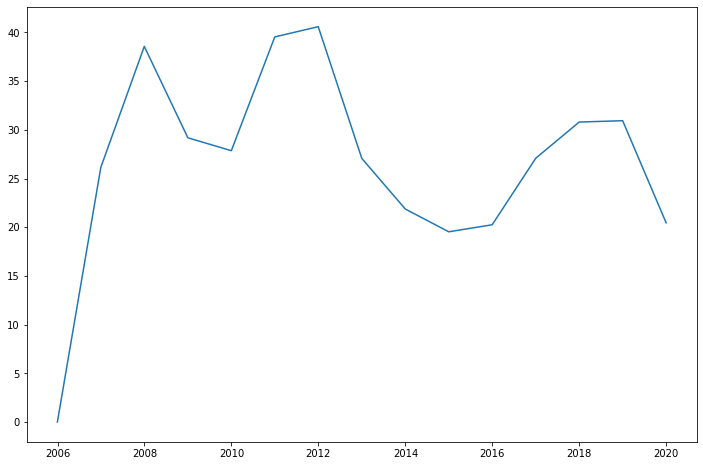

In [114]:
plt.plot(ms.index, ms['Yearly Growth %'])

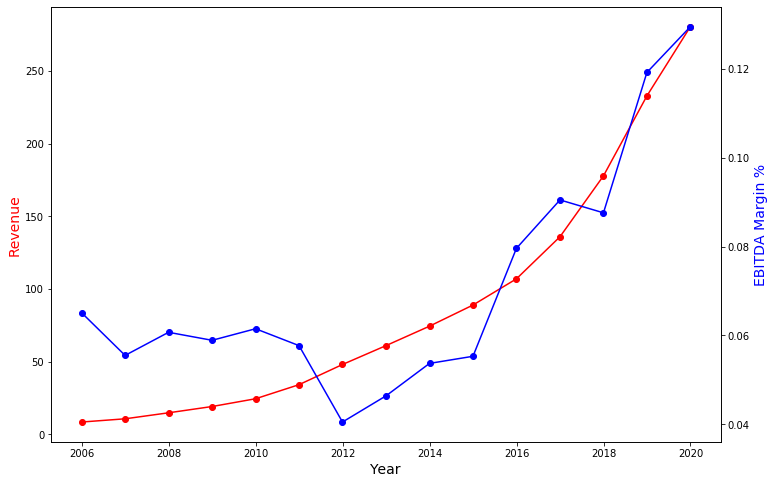

In [115]:
#Correct way of plotting 2 different commodities
fig,ax=plt.subplots()
ax.plot(ms.index, ms["Revenue"], color='red', marker="o")
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Revenue",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(ms.index, ms["EBITDA Margin (%)"],color="blue",marker="o")
ax2.set_ylabel("EBITDA Margin %",color="blue",fontsize=14)
plt.show()

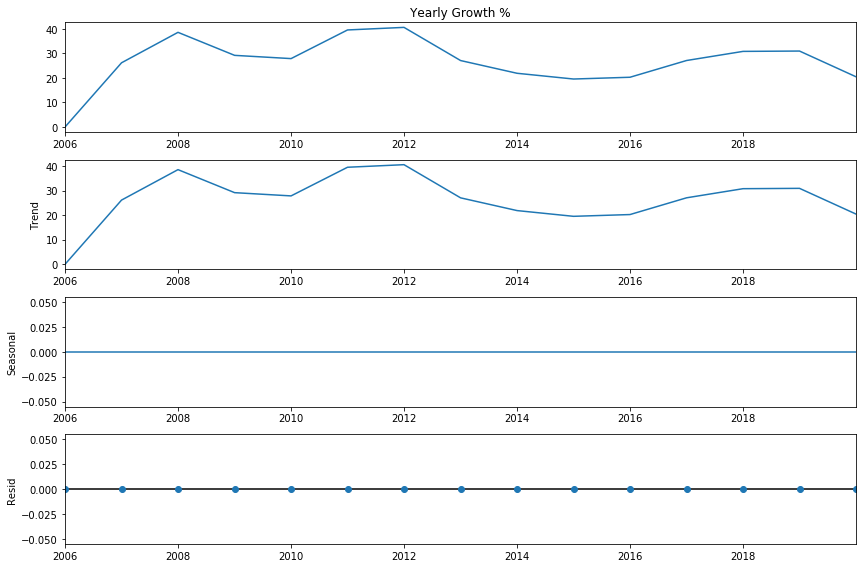

In [116]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(ms['Yearly Growth %'], model='additive')
fig=decomposition.plot()
plt.rcParams['figure.figsize']=[12.0,8.0]

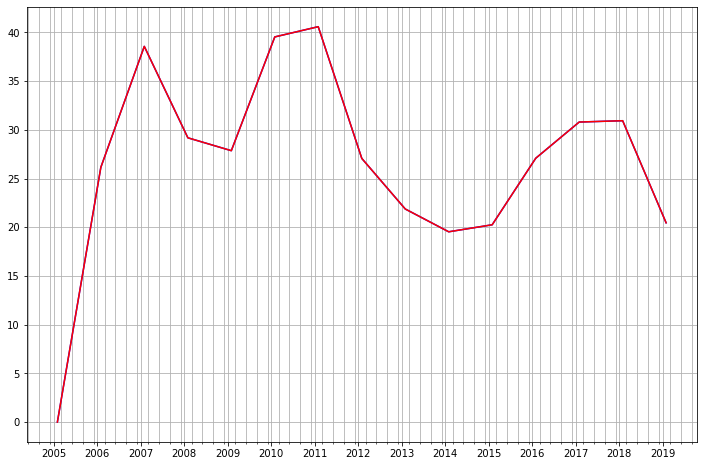

In [117]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=12)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(ms.index, ms['Yearly Growth %'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [118]:
x=ms['Yearly Growth %'].sum()
y=len(ms.index)

In [119]:
Average= (x/(y-1))
print("Average year-on-year growth rate is- ", Average, "%")

Average year-on-year growth rate is-  28.55959133572059 %


In [120]:
ms['Year'] = ms.index.year
mydict = dict(zip(ms['Year'], ms['Yearly Growth %']))

In [121]:
mydict

{2005: 0.0,
 2006: 26.14840989399294,
 2007: 38.56209150326796,
 2008: 29.177897574124,
 2009: 27.856025039123626,
 2010: 39.53488372093024,
 2011: 40.584795321637415,
 2012: 27.059068219633954,
 2013: 21.869373056146664,
 2014: 19.529885829415704,
 2015: 20.249466232160927,
 2016: 27.081581160639196,
 2017: 30.79638208691815,
 2018: 30.932703659976372,
 2019: 20.451715402121174}

In [122]:
for key, value in mydict.items():
    if value == 0:
        print("Starting Point for growth calculation is- ", key)
    if value >0 and value <= ms['Yearly Growth %'].max()/4:
        print("Poor growth for the year- ", key)
    if value > ms['Yearly Growth %'].max()/4 and value <= ms['Yearly Growth %'].max()/2:
        print("Low growth for the year- ", key)
    if value > ms['Yearly Growth %'].max()/2 and value <= 3*ms['Yearly Growth %'].max()/4:
        print("Moderate growth for the year- ", key)
    if value > 3*ms['Yearly Growth %'].max()/4 and value <= ms['Yearly Growth %'].max():
        print("High growth for the year- ", key)
print()
print("Max Growth Rate is- ", ms['Yearly Growth %'].max(),"%")
print()
print("Average Growth Rate is- ", Average, "%")

    

Starting Point for growth calculation is-  2005
Moderate growth for the year-  2006
High growth for the year-  2007
Moderate growth for the year-  2008
Moderate growth for the year-  2009
High growth for the year-  2010
High growth for the year-  2011
Moderate growth for the year-  2012
Moderate growth for the year-  2013
Low growth for the year-  2014
Low growth for the year-  2015
Moderate growth for the year-  2016
High growth for the year-  2017
High growth for the year-  2018
Moderate growth for the year-  2019

Max Growth Rate is-  40.584795321637415 %

Average Growth Rate is-  28.55959133572059 %


In [194]:
a=input("Enter the starting year- ")
b=input("Enter the number of years- ")

Enter the starting year- 2006
Enter the number of years- 7


In [195]:
z=(int(a)+int(b)-1)
c=str(z)

In [196]:
ms2=ms.loc[a:c]

In [197]:
ms2.drop(['Revenue1','a'], axis=1)

,TTM Revenue,TTM EBITDA,EBITDA Margin (%),Revenue,EBITDA,Yearly Growth %,Year
Valuation Date,,,,,,,
2006-12-31,$10.71B,$0.59B,0.0555,10.71,0.59,26.148410,2006
2007-12-31,$14.84B,$0.90B,0.0607,14.84,0.90,38.562092,2007
2008-12-31,$19.17B,$1.13B,0.0589,19.17,1.13,29.177898,2008
2009-12-31,$24.51B,$1.51B,0.0615,24.51,1.51,27.856025,2009
2010-12-31,$34.20B,$1.97B,0.0577,34.20,1.97,39.534884,2010
2011-12-31,$48.08B,$1.95B,0.0405,48.08,1.95,40.584795,2011
2012-12-31,$61.09B,$2.84B,0.0464,61.09,2.84,27.059068,2012


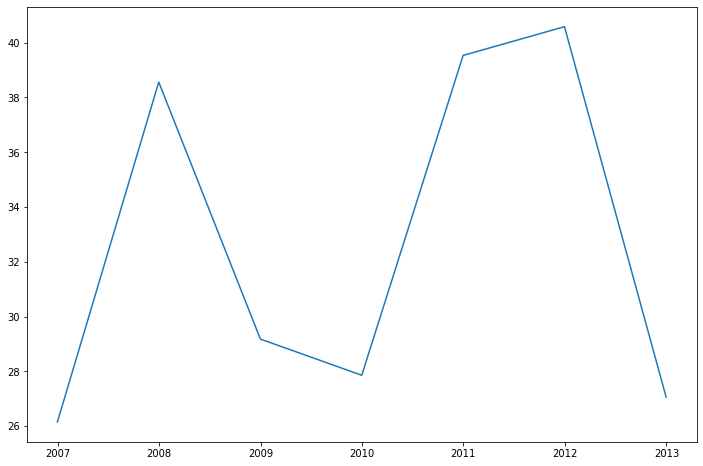

In [198]:
plt.plot(ms2.index, ms2['Yearly Growth %'])

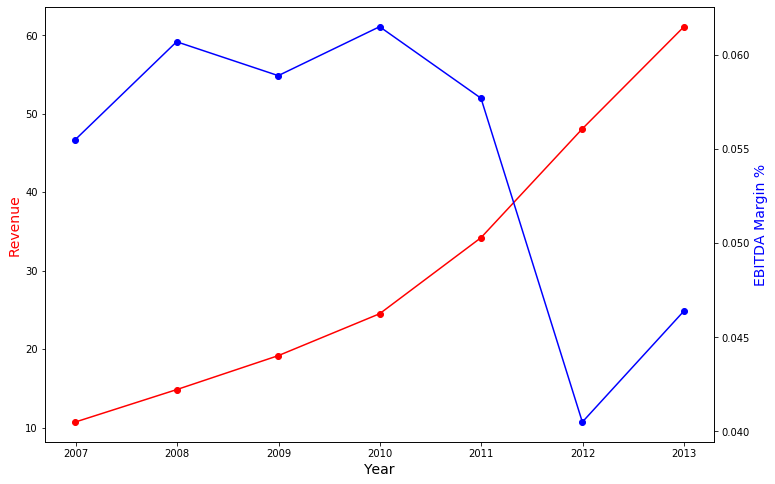

In [199]:
#Correct way of plotting 2 different commodities
fig,ax=plt.subplots()
ax.plot(ms2.index, ms2["Revenue"], color='red', marker="o")
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Revenue",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(ms2.index, ms2["EBITDA Margin (%)"],color="blue",marker="o")
ax2.set_ylabel("EBITDA Margin %",color="blue",fontsize=14)
plt.show()

In [200]:
p=ms2['Yearly Growth %'].sum()
q=len(ms2.index)

In [201]:
Average2= (p/(q))
print("Average year-on-year growth rate is- ", Average2, "%")

Average year-on-year growth rate is-  32.70331018181573 %


In [202]:
mydict2 = dict(zip(ms2['Year'], ms2['Yearly Growth %']))

In [203]:
mydict2

{2006: 26.14840989399294,
 2007: 38.56209150326796,
 2008: 29.177897574124,
 2009: 27.856025039123626,
 2010: 39.53488372093024,
 2011: 40.584795321637415,
 2012: 27.059068219633954}

In [205]:
for key, value in mydict2.items():
    if value == 0:
        print("Starting Point for growth calculation is- ", key)
    if value >0 and value <= ms['Yearly Growth %'].max()/4:
        print("Poor growth for the year- ", key)
    if value > ms['Yearly Growth %'].max()/4 and value <= ms['Yearly Growth %'].max()/2:
        print("Low growth for the year- ", key)
    if value > ms['Yearly Growth %'].max()/2 and value <= 3*ms['Yearly Growth %'].max()/4:
        print("Moderate growth for the year- ", key)
    if value > 3*ms['Yearly Growth %'].max()/4 and value <= ms['Yearly Growth %'].max():
        print("High growth for the year- ", key)
print()
print("Max Growth Rate in this period is- ", ms2['Yearly Growth %'].max(),"%")
print()
print("Average Growth Rate in this period is- ", Average2)
if Average2<Average:
    print("Average Growth Rate in this period is lower than the overall average by- ", (Average-Average2), "%")
if Average2>Average:
    print("Average Growth Rate in this period is higher than the overall average by- ", (Average2-Average), "%")

Moderate growth for the year-  2006
High growth for the year-  2007
Moderate growth for the year-  2008
Moderate growth for the year-  2009
High growth for the year-  2010
High growth for the year-  2011
Moderate growth for the year-  2012

Max Growth Rate in this period is-  40.584795321637415 %

Average Growth Rate in this period is-  32.70331018181573
Average Growth Rate in this period is higher than the overall average by-  4.14371884609514 %
